<a href="https://colab.research.google.com/github/franciskingk/Analysis-IP-week-2/blob/main/Carrefour_marketing_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carrefour research project

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

## Dimensionality reduction

In [123]:
# installing the libraries
library(data.table)
library(tidyverse)
#install.packages('corrplot')
library(corrplot)
library(ggplot2)
library(dplyr)
#install.packages('caret')
library(caret)
install.packages('arules')
library(arules)
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [4]:
#reading the dataset
df <- read.csv('http://bit.ly/CarreFourDataset')
head(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
# checking the data for duplicates
duplicated(df)
# there are no duplicates

In [7]:
# checking for null values
colSums(is.na(df))
#there are no nulls

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

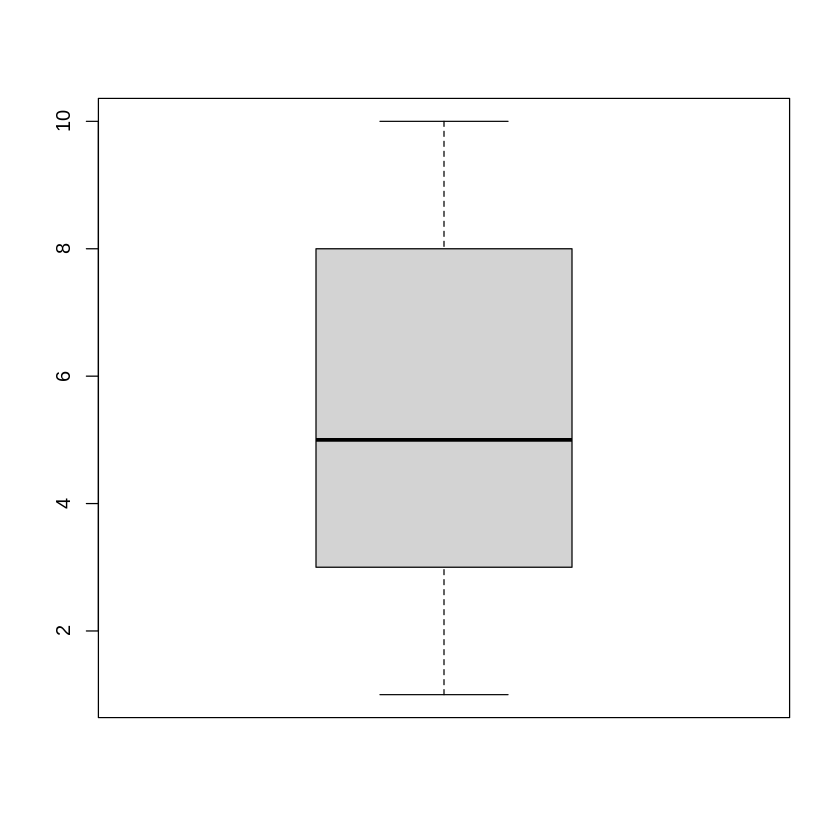

In [13]:
# outliers in the quantity data
boxplot(df$Quantity)

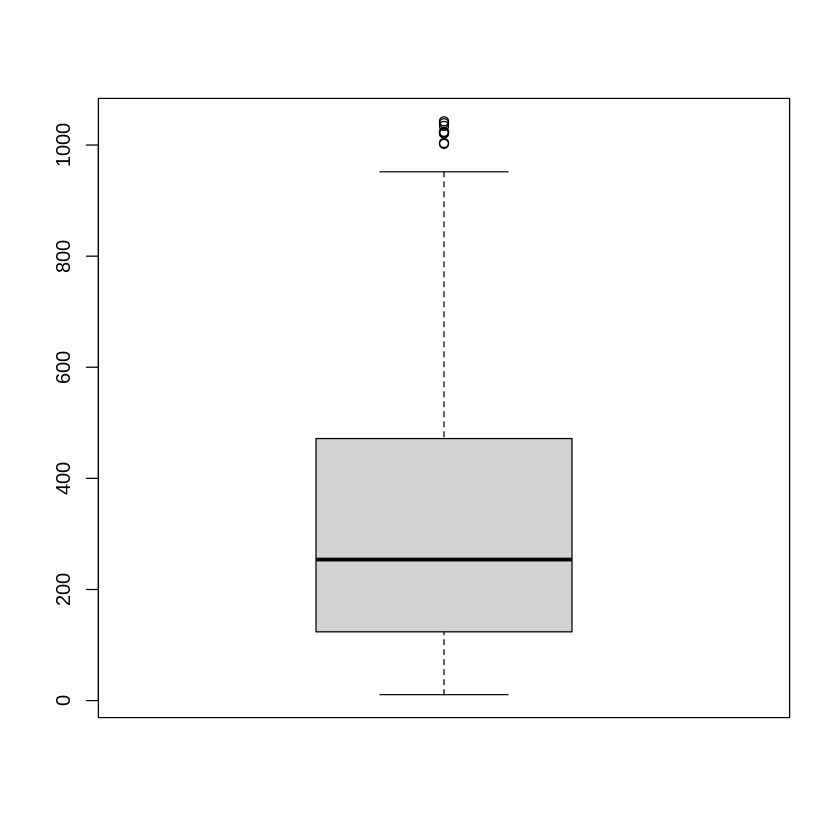

In [14]:
# outliers in total
boxplot(df$Total)
# there are few outliers in total column

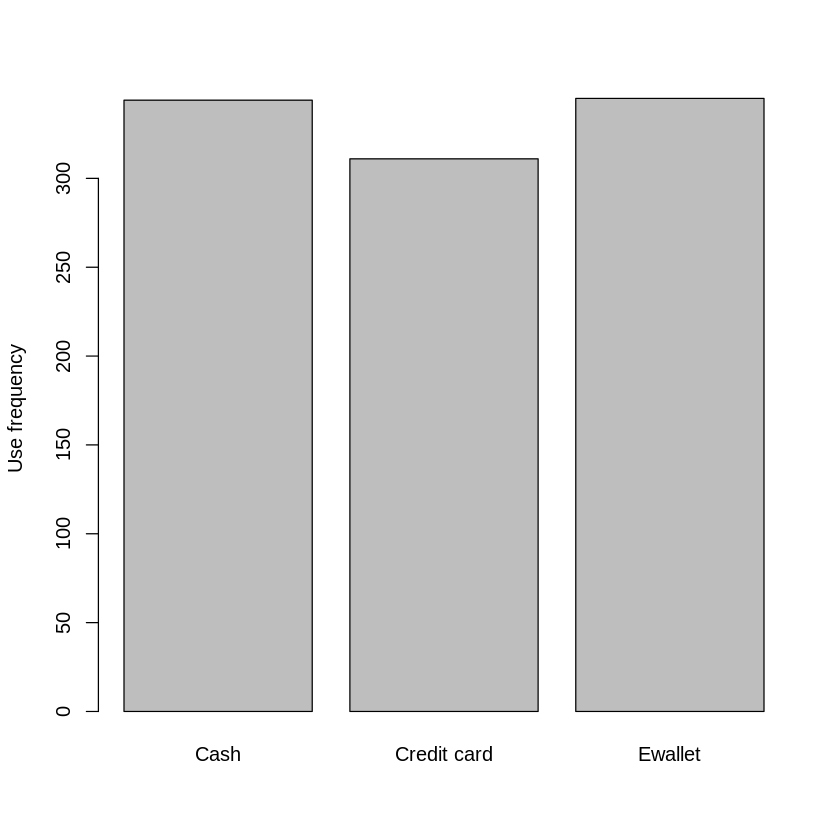

In [19]:
# plotting to see most used payment method
method <- df$Payment
method_table <- table(method)
barplot(method_table,ylab= 'Use frequency')

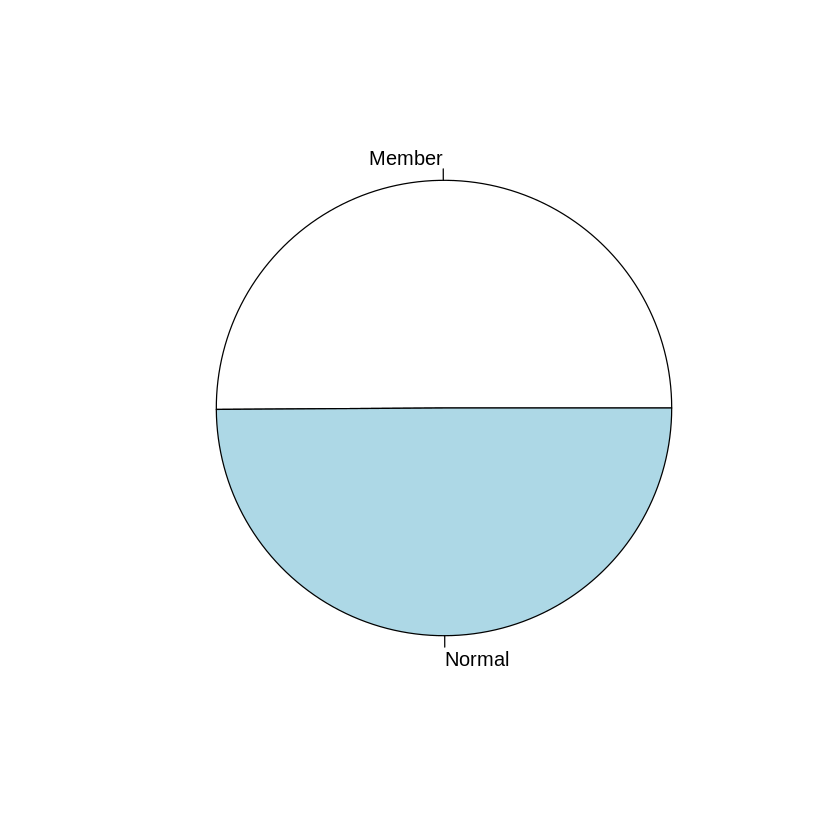

In [24]:
# plotting to see the most customer type
customer <- df$Customer.type
customer_count <- table(customer)
pie(customer_count)
# both member and non member customers haver the same frequency. 

In [84]:
# well use pca for this reduction thus encoding to numeric
#removing Time and ID columns not in use.
real_variables<-dummyVars("~.",data=df[,-c(1,9,10)])
real_variables

Dummy Variable Object

Formula: ~.
<environment: 0x55ff9341ec48>
13 variables, 1 factors
Variables and levels will be separated by '.'
A less than full rank encoding is used

In [85]:
real_df<-data.frame(predict(real_variables,newdata =df[,-c(1,9,10)]))
real_df

,BranchA,BranchB,BranchC,Customer.type.Member,Customer.type.Normal,GenderFemale,GenderMale,Product.lineElectronic.accessories,Product.lineFashion.accessories,Product.lineFood.and.beverages,⋯,Quantity,Tax,PaymentCash,PaymentCredit.card,PaymentEwallet,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,0,1,0,0,0,0,⋯,7,26.1415,0,0,1,522.83,4.761905,26.1415,9.1,548.9715
2,0,0,1,0,1,1,0,1,0,0,⋯,5,3.8200,1,0,0,76.40,4.761905,3.8200,9.6,80.2200
3,1,0,0,0,1,0,1,0,0,0,⋯,7,16.2155,0,1,0,324.31,4.761905,16.2155,7.4,340.5255
4,1,0,0,1,0,0,1,0,0,0,⋯,8,23.2880,0,0,1,465.76,4.761905,23.2880,8.4,489.0480
5,1,0,0,0,1,0,1,0,0,0,⋯,7,30.2085,0,0,1,604.17,4.761905,30.2085,5.3,634.3785
6,0,0,1,0,1,0,1,1,0,0,⋯,7,29.8865,0,0,1,597.73,4.761905,29.8865,4.1,627.6165
7,1,0,0,1,0,1,0,1,0,0,⋯,6,20.6520,0,0,1,413.04,4.761905,20.6520,5.8,433.6920
8,0,0,1,0,1,1,0,0,0,0,⋯,10,36.7800,0,0,1,735.60,4.761905,36.7800,8.0,772.3800
9,1,0,0,1,0,1,0,0,0,0,⋯,2,3.6260,0,1,0,72.52,4.761905,3.6260,7.2,76.1460


In [86]:
# standardising
real_df.pca<-prcomp((real_df),center = TRUE)
print(real_df.pca)

Standard deviations (1, .., p=24):
 [1] 3.403819e+02 2.053220e+01 1.719967e+00 1.246753e+00 7.268821e-01
 [6] 6.944099e-01 5.945089e-01 5.811926e-01 5.690861e-01 5.568613e-01
[11] 4.180209e-01 4.106769e-01 4.077796e-01 4.004978e-01 3.904585e-01
[16] 1.145177e-13 5.038728e-15 1.694650e-15 1.150768e-15 3.197777e-16
[21] 2.124103e-16 1.060106e-16 5.282457e-17 5.857208e-33

Rotation (n x k) = (24 x 24):
                                             PC1           PC2           PC3
BranchA                            -4.317932e-05  1.346280e-04 -6.992094e-03
BranchB                            -1.225823e-05 -1.564833e-04  1.952501e-02
BranchC                             5.543756e-05  2.185531e-05 -1.253292e-02
Customer.type.Member                2.895310e-05 -2.410048e-04  5.964620e-03
Customer.type.Normal               -2.895310e-05  2.410048e-04 -5.964620e-03
GenderFemale                        7.241457e-05  1.480937e-03  3.773505e-04
GenderMale                         -7.241457e-05 -1.480937

In [87]:
# summary of pca
summary(real_df.pca)

Importance of components:
                            PC1      PC2     PC3     PC4    PC5    PC6    PC7
Standard deviation     340.3819 20.53220 1.71997 1.24675 0.7269 0.6944 0.5945
Proportion of Variance   0.9963  0.00363 0.00003 0.00001 0.0000 0.0000 0.0000
Cumulative Proportion    0.9963  0.99993 0.99996 0.99997 1.0000 1.0000 1.0000
                          PC8    PC9   PC10  PC11   PC12   PC13   PC14   PC15
Standard deviation     0.5812 0.5691 0.5569 0.418 0.4107 0.4078 0.4005 0.3905
Proportion of Variance 0.0000 0.0000 0.0000 0.000 0.0000 0.0000 0.0000 0.0000
Cumulative Proportion  1.0000 1.0000 1.0000 1.000 1.0000 1.0000 1.0000 1.0000
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     1.145e-13 5.039e-15 1.695e-15 1.151e-15 3.198e-16
Proportion of Variance 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
                            PC21     PC22      PC23      P

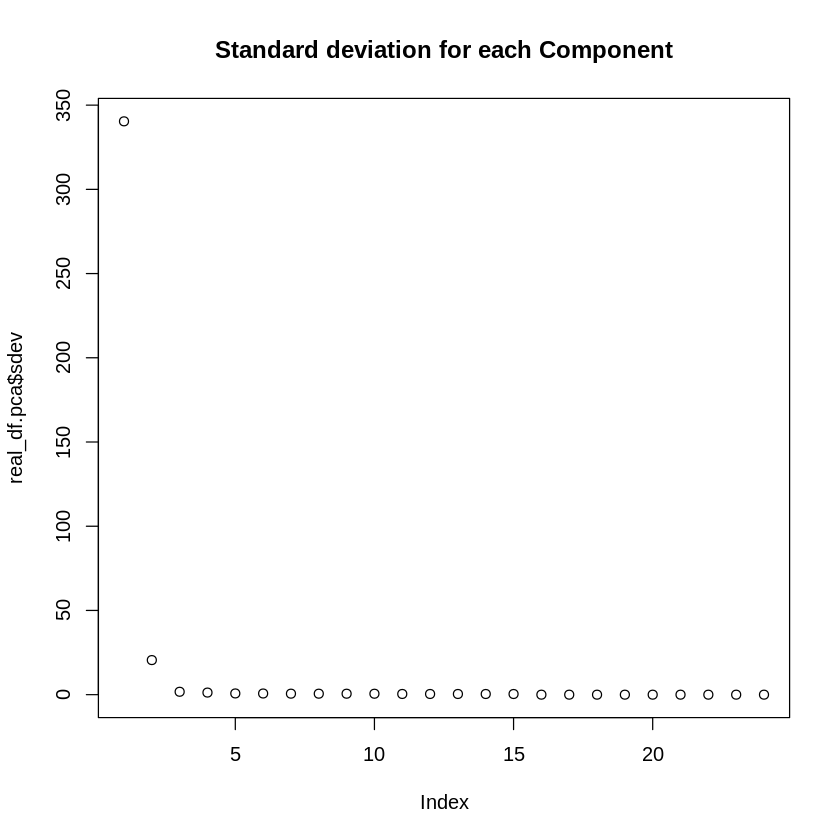

In [89]:
# plotting to see the data in the new reduced dimension using standard dev

plot(real_df.pca$sdev,main="Standard deviation for each Component")
# the first has the most significance followed by the second component. The rest range around zero

## Feature selection

In [109]:
#dealing with numeric features and finding correlation 
numeric_df <- select_if(df,is.numeric)
#summary(numeric_df)
corr<- cor(numeric_df)
corr

Warning message in cor(numeric_df):
“the standard deviation is zero”


,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
Unit.price,1.000000000,0.01077756,0.6339621,0.6339621,NA,0.6339621,-0.008777507,0.6339621
Quantity,0.010777564,1.00000000,0.7055102,0.7055102,NA,0.7055102,-0.015814905,0.7055102
Tax,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
cogs,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
gross.margin.percentage,NA,NA,NA,NA,1,NA,NA,NA
gross.income,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
Rating,-0.008777507,-0.01581490,-0.0364417,-0.0364417,NA,-0.0364417,1.000000000,-0.0364417
Total,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000


In [115]:
#getting the most correlated features
most_corr <- findCorrelation(corr)
most_corr
# The most correlated are cogs,Tax and Total.

[1] 4 8 3

## Association Rules

This section will require that you create association rules that will allow you to identify relationships between variables in the dataset. You are provided with a separate dataset that comprises groups of items that will be associated with others. Just like in the other sections, you will also be required to provide insights for your analysis.

In [124]:
# loading and previewing the dataset
df2<- read.transactions('http://bit.ly/SupermarketDatasetII',sep=',')
summary(df2)

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

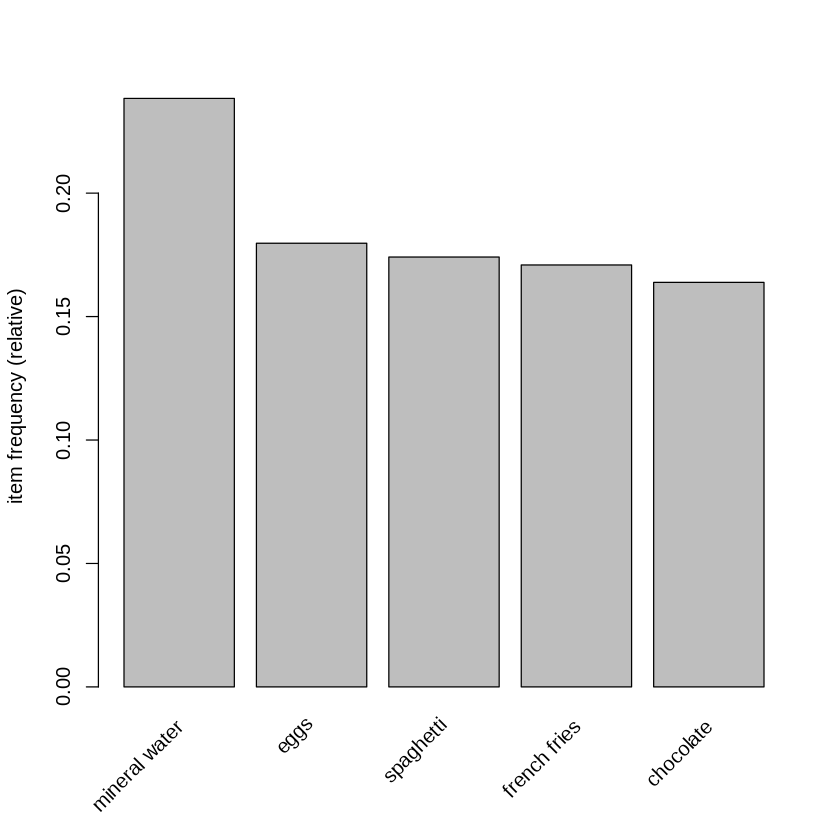

In [134]:
# Checking the item frequency of the top 5 items
itemFrequencyPlot(df2, topN = 5)


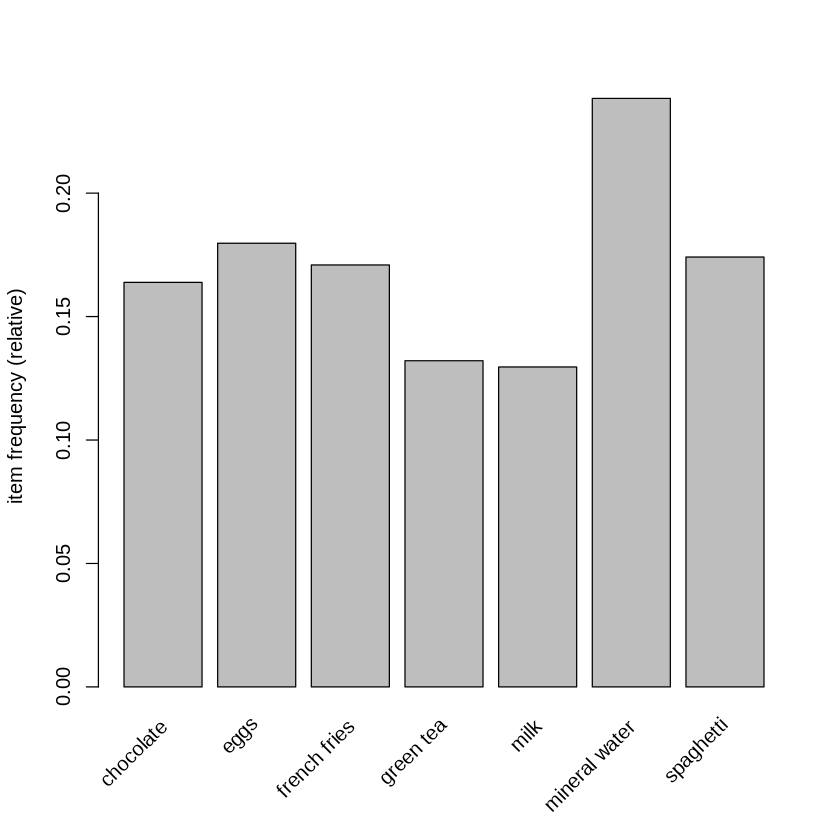

In [133]:
# plotting to see the frequency of the items
itemFrequencyPlot(df2,support= 0.1)

In [141]:
# apriori model building
params <- apriori(df2, parameter = list(supp=0.001, conf=0.8))
params

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [142]:
summary(params)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
 data ntransactions support confidence
  df2          7501   0.001        0.8
                                                        

In [144]:
inspect(params[1:10])

     lhs                              rhs             support     confidence
[1]  {frozen smoothie, spinach}    => {mineral water} 0.001066524 0.8888889 
[2]  {bacon, pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3]  {nonfat milk, turkey}         => {mineral water} 0.001199840 0.8181818 
[4]  {ground beef, nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5]  {mushroom cream sauce, pasta} => {escalope}      0.002532996 0.9500000 
[6]  {milk, pasta}                 => {shrimp}        0.001599787 0.8571429 
[7]  {cooking oil, fromage blanc}  => {mineral water} 0.001199840 0.8181818 
[8]  {black tea, salmon}           => {mineral water} 0.001066524 0.8000000 
[9]  {black tea, frozen smoothie}  => {milk}          0.001199840 0.8181818 
[10] {red wine, tomato sauce}      => {chocolate}     0.001066524 0.8000000 
     coverage    lift      count
[1]  0.001199840  3.729058  8   
[2]  0.002133049  4.666587 13   
[3]  0.001466471  3.432428  9   
[4]  0.001866418  3.5

In [147]:
# sorting the rules in level of importance in terms of confidence levels
sorted_params<-sort(params,by='confidence',decreasing=TRUE)
inspect(sorted_params[1:10])

     lhs                        rhs                 support confidence    coverage      lift count
[1]  {french fries,                                                                               
      mushroom cream sauce,                                                                       
      pasta}                 => {escalope}      0.001066524  1.0000000 0.001066524 12.606723     8
[2]  {ground beef,                                                                                
      light cream,                                                                                
      olive oil}             => {mineral water} 0.001199840  1.0000000 0.001199840  4.195190     9
[3]  {cake,                                                                                       
      meatballs,                                                                                  
      mineral water}         => {milk}          0.001066524  1.0000000 0.001066524  7.717078     8
[4]  {cake

## Anomaly detection

You have also been requested to check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.



In [148]:
# loading and previewing the dataset
df3<-read_csv('http://bit.ly/CarreFourSalesDataset')
head(df3)

Rows: 1000 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (1): Sales


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


In [150]:
# imprting the libraries needed
install.packages('tibble')
library(tibble)
install.packages('tibbletime')
library(tibbletime)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘tibbletime’


The following object is masked from ‘package:stats’:

    filter


